In [1]:
import pandas as pd
import numpy as np
import tqdm
import warnings
import matplotlib.pyplot as plt

pd.set_option("max_rows", 200)
pd.set_option("max_columns", 50)

%matplotlib inline

In [2]:


data_types_dict = {
    'row_id': 'int64',
    'timestamp': 'int64',
    'user_id': 'int32',
    'content_id': 'int16',
    'content_type_id': 'int8',
    'task_container_id': 'int16',
    'user_answer': 'int8',
    'answered_correctly': 'int8',
}


df = pd.read_pickle("../input/riiid-test-answer-prediction/split10/train_0.pickle")

In [3]:
import sys
sys.path.append("../")
# df = pd.read_pickle("../input/riiid-test-answer-prediction/split10/train_0.pickle")
df = df.sort_values(["user_id", "timestamp"])
# large_user_id = df["user_id"].value_counts()
# large_user_id = large_user_id[large_user_id > 1000] 
# df = df[df["user_id"].isin(large_user_id.index)]
# df = df[df["answered_correctly"] != -1]

In [4]:
df["answered_correctly"] = df["answered_correctly"].replace(-1, np.nan)

In [7]:
df.columns

Index(['timestamp', 'user_id', 'content_id', 'content_type_id',
       'task_container_id', 'user_answer', 'answered_correctly',
       'prior_question_elapsed_time', 'prior_question_had_explanation',
       'bundle_id', 'correct_answer', 'part', 'tags', 'tag', 'type_of'],
      dtype='object')

In [6]:
df.groupby("part")["answered_correctly"].describe()

,count,mean,std,min,25%,50%,75%,max
part,,,,,,,,
1,739909.0,0.742731,0.437129,0.0,0.0,1.0,1.0,1.0
2,1864246.0,0.707844,0.454754,0.0,0.0,1.0,1.0,1.0
3,838759.0,0.695663,0.460126,0.0,0.0,1.0,1.0,1.0
4,786018.0,0.624581,0.484231,0.0,0.0,1.0,1.0,1.0
5,4088416.0,0.609541,0.487853,0.0,0.0,1.0,1.0,1.0
6,1028810.0,0.668724,0.470672,0.0,0.0,1.0,1.0,1.0
7,491384.0,0.651527,0.476487,0.0,0.0,1.0,1.0,1.0


# 解答時間(prior_question_elapsed_time)

In [8]:
df.groupby("part")["prior_question_elapsed_time"].describe()

,count,mean,std,min,25%,50%,75%,max
part,,,,,,,,
1,723413.0,22708.257812,12087.825195,0.0,19000.0,22000.0,24000.0,300000.0
2,1864057.0,18740.923828,10909.083008,0.0,16000.0,17000.0,19000.0,300000.0
3,838759.0,23729.966797,14302.803711,0.0,17000.0,23666.0,28333.0,300000.0
4,786018.0,23756.876953,14133.510742,0.0,17333.0,24000.0,28666.0,300000.0
5,4065917.0,25207.400391,21532.363281,0.0,13000.0,20000.0,31000.0,300000.0
6,1028810.0,32644.746094,20646.951172,0.0,21000.0,29250.0,40000.0,300000.0
7,491384.0,46975.832031,30105.304688,0.0,26000.0,43500.0,62666.0,300000.0


In [12]:
df["mean"] = df.groupby(["part"])["prior_question_elapsed_time"].transform("mean")

In [14]:
df["diff"] = df["prior_question_elapsed_time"] - df["mean"]

In [16]:
df.groupby("answered_correctly")["diff"].describe()

,count,mean,std,min,25%,50%,75%,max
answered_correctly,,,,,,,,
0.0,3381328.0,13.195158,19630.634766,-46973.425781,-9257.119141,-1726.324219,4354.470703,281273.6875
1.0,6417030.0,-7.691855,18097.111328,-46973.425781,-8257.119141,-1726.324219,3742.880859,281273.6875


answered_correctly
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: diff, dtype: object

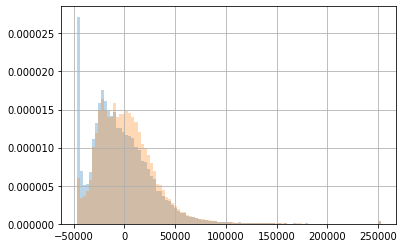

In [33]:
df[df["part"] == 7].groupby("answered_correctly")["diff"].hist(density=True, alpha=0.3, bins=100)

In [25]:
for i in range(1, 8):
    print(f"--- {i} ---")
    print(df[df["part"] == i].groupby("answered_correctly")["diff"].describe()[["count", "mean", "std"]])
    

--- 1 ---
                       count        mean           std
answered_correctly                                    
0.0                 187711.0  268.648712  12664.444336
1.0                 535702.0  -93.867279  11883.838867
--- 2 ---
                        count        mean           std
answered_correctly                                     
0.0                  544577.0  309.025360  11520.645508
1.0                 1319480.0 -128.040665  10682.215820
--- 3 ---
                       count        mean           std
answered_correctly                                    
0.0                 255265.0 -311.801849  14857.734375
1.0                 583494.0  136.972702  14055.283203
--- 4 ---
                       count        mean           std
answered_correctly                                    
0.0                 295086.0 -354.311890  14178.826172
1.0                 490932.0  212.473816  14106.291016
--- 5 ---
                        count        mean           std
answered_c

answered_correctly
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: diff, dtype: object

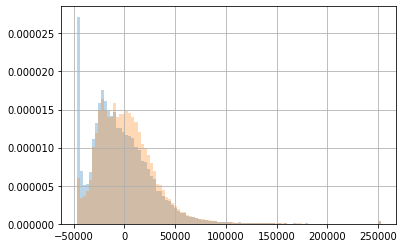

In [34]:
df[df["part"] == 7].groupby("answered_correctly")["diff"].hist(density=True, alpha=0.3, bins=100)

answered_correctly
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: diff, dtype: object

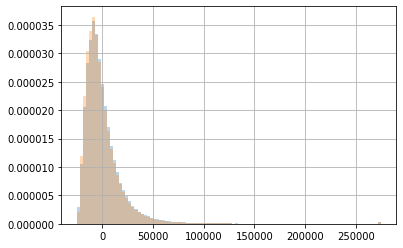

In [36]:
df[df["part"] == 5].groupby("answered_correctly")["diff"]

# 解答時間(shift1)

In [38]:
df["timeshift1"] = df.groupby("user_id")["timestamp"].shift(1)
df["timediff"] = df["timestamp"] - df["timeshift1"]
df.groupby("part")["timediff"].describe()

,count,mean,std,min,25%,50%,75%,max
part,,,,,,,,
1,740791.0,2.842528e+07,6.113579e+08,1.0,28764.0,39205.0,64887.0,7.331097e+10
2,1902485.0,2.675753e+07,5.939697e+08,0.0,25926.0,37740.0,64760.0,7.344003e+10
3,848361.0,8.618675e+06,3.312044e+08,0.0,0.0,0.0,101421.0,5.754977e+10
4,795331.0,1.027934e+07,4.263899e+08,0.0,0.0,0.0,91232.0,7.363516e+10
5,4160380.0,2.472911e+07,5.262298e+08,0.0,27295.0,44638.0,84226.0,8.388426e+10
6,1050279.0,7.496518e+06,2.416122e+08,0.0,0.0,0.0,69888.5,5.312626e+10
7,496948.0,6.657842e+06,2.182210e+08,0.0,0.0,0.0,0.0,5.858224e+10


In [39]:
df["mean"] = df.groupby(["part"])["prior_question_elapsed_time"].transform("mean")
df["diff"] = df["timediff"] - df["mean"]

In [40]:
for i in range(1, 8):
    print(f"--- {i} ---")
    print(df[df["part"] == i].groupby("answered_correctly")["diff"].describe()[["count", "mean", "std"]])
    

--- 1 ---
                       count          mean           std
answered_correctly                                      
0.0                 187711.0  3.765326e+07  7.265782e+08
1.0                 535703.0  2.484145e+07  5.612337e+08
--- 2 ---
                        count          mean           std
answered_correctly                                       
0.0                  544577.0  3.434419e+07  6.624541e+08
1.0                 1319481.0  2.373606e+07  5.674130e+08
--- 3 ---
                       count          mean           std
answered_correctly                                      
0.0                 255254.0  1.171258e+07  4.288185e+08
1.0                 583482.0  6.929029e+06  2.779052e+08
--- 4 ---
                       count          mean           std
answered_correctly                                      
0.0                 295055.0  1.440903e+07  5.389389e+08
1.0                 490916.0  7.420905e+06  3.449396e+08
--- 5 ---
                        count     

In [52]:
df["bindiff"] = pd.cut(df["diff"], [-1, 10**1, 10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8, 10**9, 10**10])


,count,mean,std,min,25%,50%,75%,max
bindiff,,,,,,,,
"(-1, 10]",125.0,0.832000,0.375371,0.0,1.0,1.0,1.0,1.0
"(10, 100]",1092.0,0.757326,0.428896,0.0,1.0,1.0,1.0,1.0
"(100, 1000]",11852.0,0.762487,0.425577,0.0,1.0,1.0,1.0,1.0
"(1000, 10000]",198154.0,0.789164,0.407903,0.0,1.0,1.0,1.0,1.0
"(10000, 100000]",364371.0,0.716975,0.450469,0.0,0.0,1.0,1.0,1.0
"(100000, 1000000]",44161.0,0.696837,0.459630,0.0,0.0,1.0,1.0,1.0
"(1000000, 10000000]",11310.0,0.727498,0.445267,0.0,0.0,1.0,1.0,1.0
"(10000000, 100000000]",20495.0,0.737399,0.440058,0.0,0.0,1.0,1.0,1.0
"(100000000, 1000000000]",9887.0,0.705270,0.455945,0.0,0.0,1.0,1.0,1.0


In [54]:
for i in range(1, 8):
    print(f"--- {i} ---")
    print(df[df["part"] == i].groupby("bindiff")["answered_correctly"].describe()[["count", "mean"]])
    

--- 1 ---
                              count      mean
bindiff                                      
(-1, 10]                      125.0  0.832000
(10, 100]                    1092.0  0.757326
(100, 1000]                 11852.0  0.762487
(1000, 10000]              198154.0  0.789164
(10000, 100000]            364371.0  0.716975
(100000, 1000000]           44161.0  0.696837
(1000000, 10000000]         11310.0  0.727498
(10000000, 100000000]       20495.0  0.737399
(100000000, 1000000000]      9887.0  0.705270
(1000000000, 10000000000]    2417.0  0.659495
--- 2 ---
                               count      mean
bindiff                                       
(-1, 10]                       262.0  0.851145
(10, 100]                     2195.0  0.825968
(100, 1000]                  26607.0  0.839704
(1000, 10000]               510800.0  0.779045
(10000, 100000]            1001651.0  0.676456
(100000, 1000000]           132514.0  0.642166
(1000000, 10000000]          27646.0  0.668958
(1000

# part1-7で分割

In [5]:
large_user_id = df["user_id"].value_counts()
large_user_id = large_user_id[large_user_id > 1000] 
df = df[df["user_id"].isin(large_user_id.index)]

In [6]:
for i in [1, 2, 3, 4, 5, 6, 7]:
    df[f"part{i}"] = (df["part"] == i).astype("float16").replace(0, np.nan)

In [7]:
ret = []
for i in [1, 2, 3, 4, 5, 6, 7]:
    d = df.groupby(["user_id", f"part{i}"])["answered_correctly"].mean().reset_index()
    d = d[["user_id", "answered_correctly"]].rename(columns={"answered_correctly": f"part{i}"})
    ret.append(d)

In [8]:
ret.append(df.groupby("user_id")["answered_correctly"].mean().reset_index())

In [9]:
df_merge = ret[0]

In [10]:
for d in ret[1:]:
    df_merge = pd.merge(df_merge, d, how="outer")

In [11]:
df_merge

,user_id,part1,part2,part3,part4,part5,part6,part7,answered_correctly
0,138650,0.750000,0.595395,0.819444,0.794872,0.734637,0.748691,0.862069,0.713628
1,475020,0.650000,0.584906,0.708772,0.634921,0.626087,0.708904,0.697248,0.677757
2,1283420,0.937759,0.884277,0.893404,0.841865,0.690516,0.788091,0.798969,0.828785
3,9097620,0.814815,0.772727,0.683761,0.755556,0.660099,0.700405,0.738095,0.686025
4,11404670,0.666667,0.539773,0.571429,0.666667,0.466581,0.812500,0.500000,0.494264
...,...,...,...,...,...,...,...,...,...
2362,2119425510,NaN,0.867268,NaN,NaN,0.709883,NaN,NaN,0.781013
2363,1721891790,NaN,NaN,0.518973,NaN,0.431655,0.434125,0.305556,0.444560
2364,1867531720,NaN,NaN,0.488506,0.400826,0.247588,0.312500,0.432584,0.374071
2365,488815650,NaN,NaN,NaN,0.275168,0.527473,0.543814,0.521739,0.499133


In [12]:
df_merge.drop("user_id", axis=1).corr()

,part1,part2,part3,part4,part5,part6,part7,answered_correctly
part1,1.000000,0.406929,0.469564,0.470775,0.325563,0.352474,0.337782,0.479704
part2,0.406929,1.000000,0.494915,0.369889,0.465575,0.359707,0.327685,0.656067
part3,0.469564,0.494915,1.000000,0.718299,0.418757,0.561217,0.556427,0.640947
part4,0.470775,0.369889,0.718299,1.000000,0.340490,0.549882,0.593495,0.559000
part5,0.325563,0.465575,0.418757,0.340490,1.000000,0.559908,0.447787,0.786445
part6,0.352474,0.359707,0.561217,0.549882,0.559908,1.000000,0.614902,0.650849
part7,0.337782,0.327685,0.556427,0.593495,0.447787,0.614902,1.000000,0.578143
answered_correctly,0.479704,0.656067,0.640947,0.559000,0.786445,0.650849,0.578143,1.000000


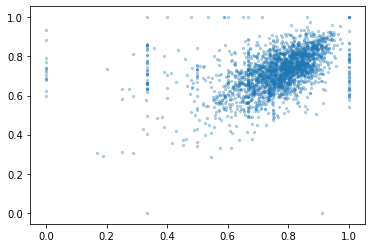

In [19]:
plt.scatter(df_merge["part1"].values, 
            df_merge["part2"].values,
            alpha=0.3,
            s=5)

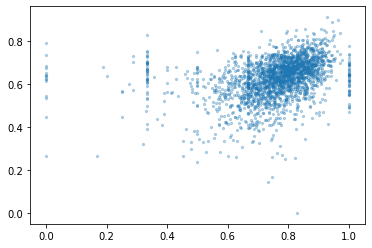

In [20]:
plt.scatter(df_merge["part1"].values, 
            df_merge["part5"].values,
            alpha=0.3,
            s=5)

In [21]:
import seaborn as sns

In [22]:
sns.pairplot(df_merge[["part1", "part2", "part3", "part4", "part5", "part6", "part7"]])

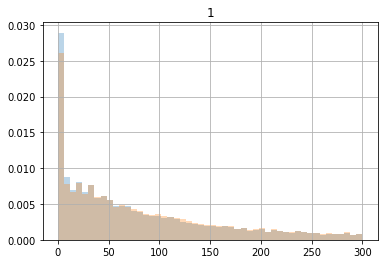

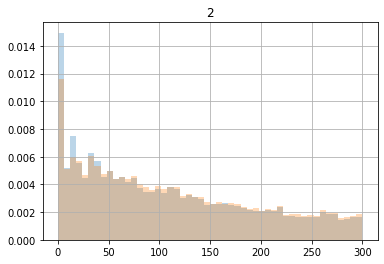

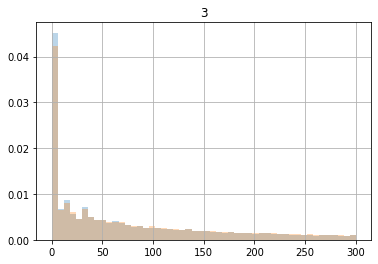

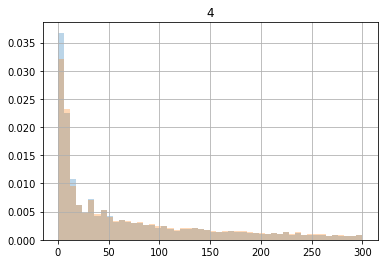

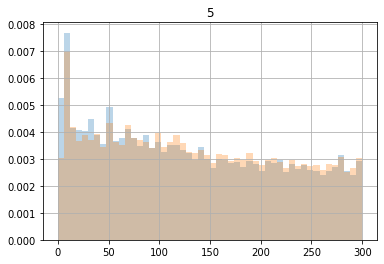

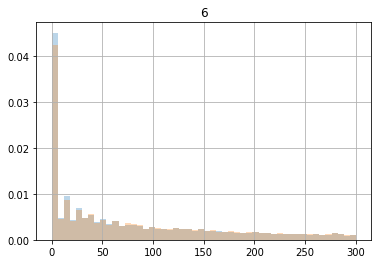

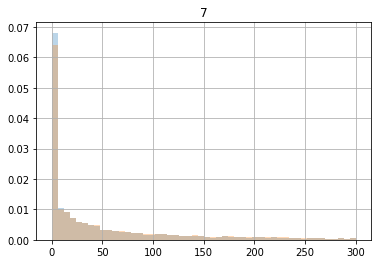

In [44]:
for i in [1, 2, 3, 4, 5, 6, 7]:
    df["w"] = df["part"] == i
    df["sum"] = df.groupby("user_id")["w"].cumsum()
    df.groupby("answered_correctly")["sum"].hist(density=True, alpha=0.3, bins=50, range=(0, 300))
    plt.title(i)
    plt.show()